In [67]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Familiar stack packages
import numpy as np
from lsst.daf.butler import Butler
import fitsio
import astropy.table as astTable
import matplotlib.pyplot as plt

In [75]:
obs_repo = '/lustre/work/xiangchong.li/work/hsc_s23b_sim'
obs_collection = 'version1/anacal_catalog_db2_match'
#obs_collection = 'test'
skymap = 'hsc'

tract_id = 10041
patch_id = 14
band = "i"

obs_butler = Butler(obs_repo, collections=obs_collection)
obs_registry = obs_butler.registry
t_skymap = obs_butler.get('skyMap', skymap=skymap)

ref = list(obs_registry.queryDatasets(
    'sim_0_rot0_Coadd_anacal_match', skymap=skymap, 
    patch=patch_id, tract=tract_id, 
    band=band
))[0]

catalog = obs_butler.get(ref)

In [76]:
mag={}
mag_dm = {}
mag_truth = {}
for band in ["g", "r", "i", "z", "y"]:
    mag.update(
        {band: 27 - np.log10(catalog[f"{band}_flux"]) * 2.5}
    )
    mag_dm.update(
        {band: 27 - 2.5 * np.log10(catalog[f"{band}_modelfit_CModel_instFlux"])}
    )
    mag_truth.update(
        {band: cat_ref[catalog["index"]][f"{band}_ab"]}
    )

/tmp/ipykernel_29285/1638490219.py:6: RuntimeWarning: invalid value encountered in log10
  {band: 27 - np.log10(catalog[f"{band}_flux"]) * 2.5}


-0.08778907466138569


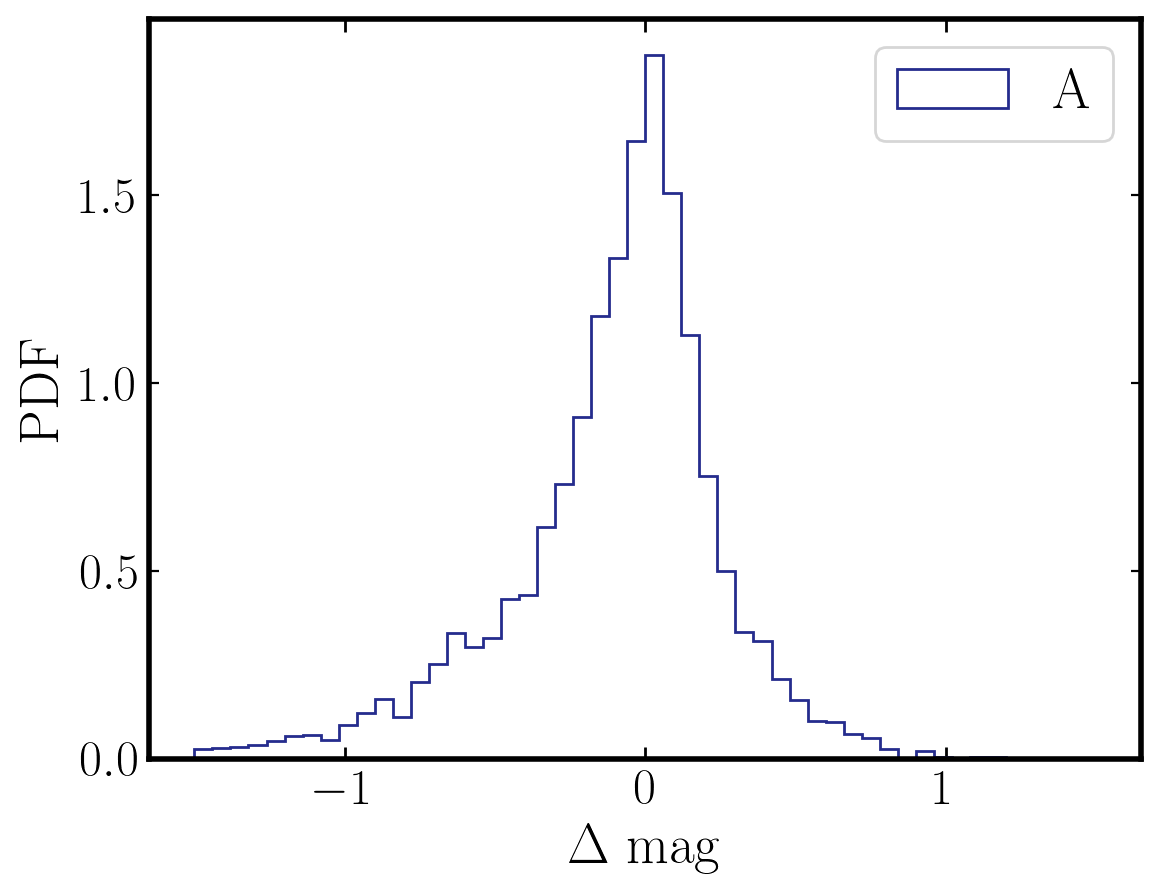

In [77]:
plt.close()
plt.hist(mag["y"] - mag_truth["y"], range=(-1.5, 1.5), bins=50, density=True, histtype="step", label="A");
plt.xlabel(r"$\Delta$ mag")
plt.ylabel("PDF")
print(np.nanmean(mag["i"] - mag_truth["i"]))
plt.legend()

-0.12232141937515122


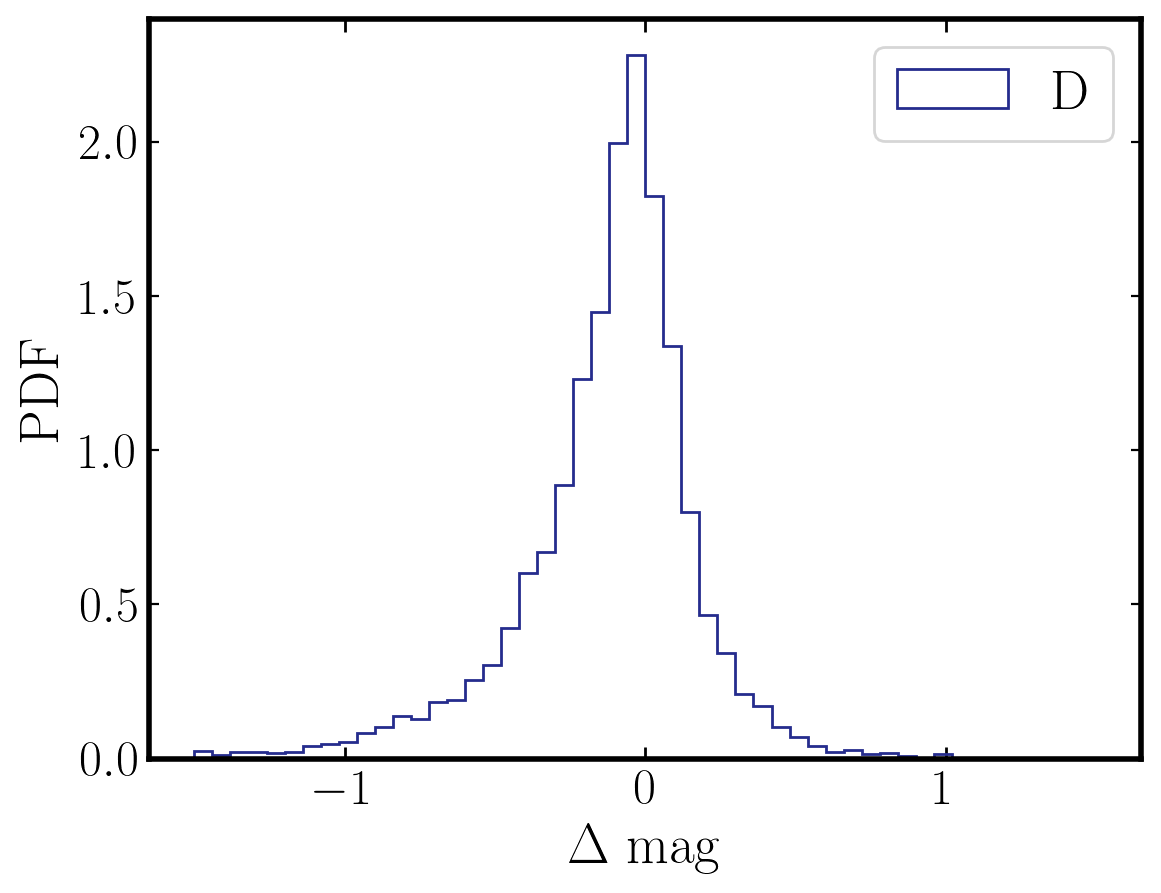

In [78]:
plt.close()
plt.hist(mag_dm["y"] - mag_truth["y"], range=(-1.5, 1.5), bins=50, density=True, histtype="step", label="D");
plt.xlabel(r"$\Delta$ mag")
plt.ylabel("PDF")
print(np.nanmean(mag_dm["y"] - mag_truth["y"]))
plt.legend()

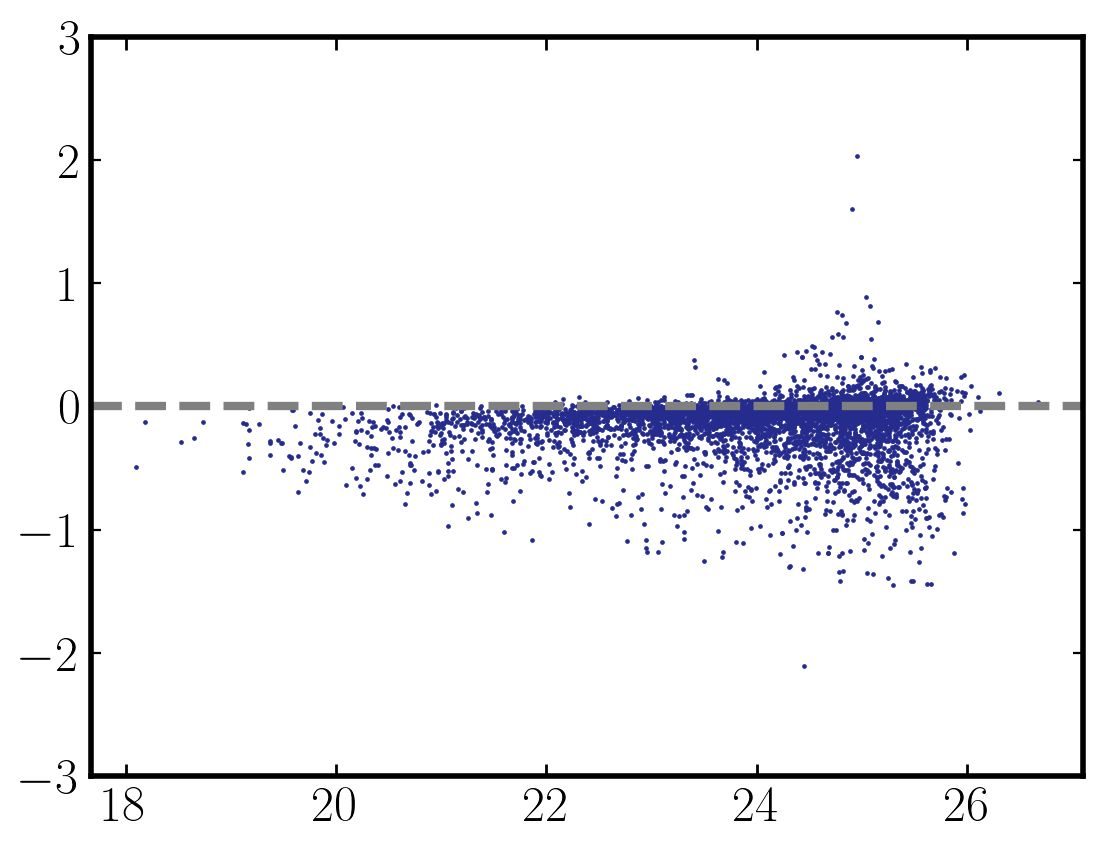

In [79]:
b1 = "g"
b2 = "r"
plt.scatter(mag_truth["i"], mag[b1] - mag[b2] - (mag_truth[b1] - mag_truth[b2]), s=0.5)
plt.ylim(-3, 3)
plt.axhline(y=0, color = "grey", ls ="--")

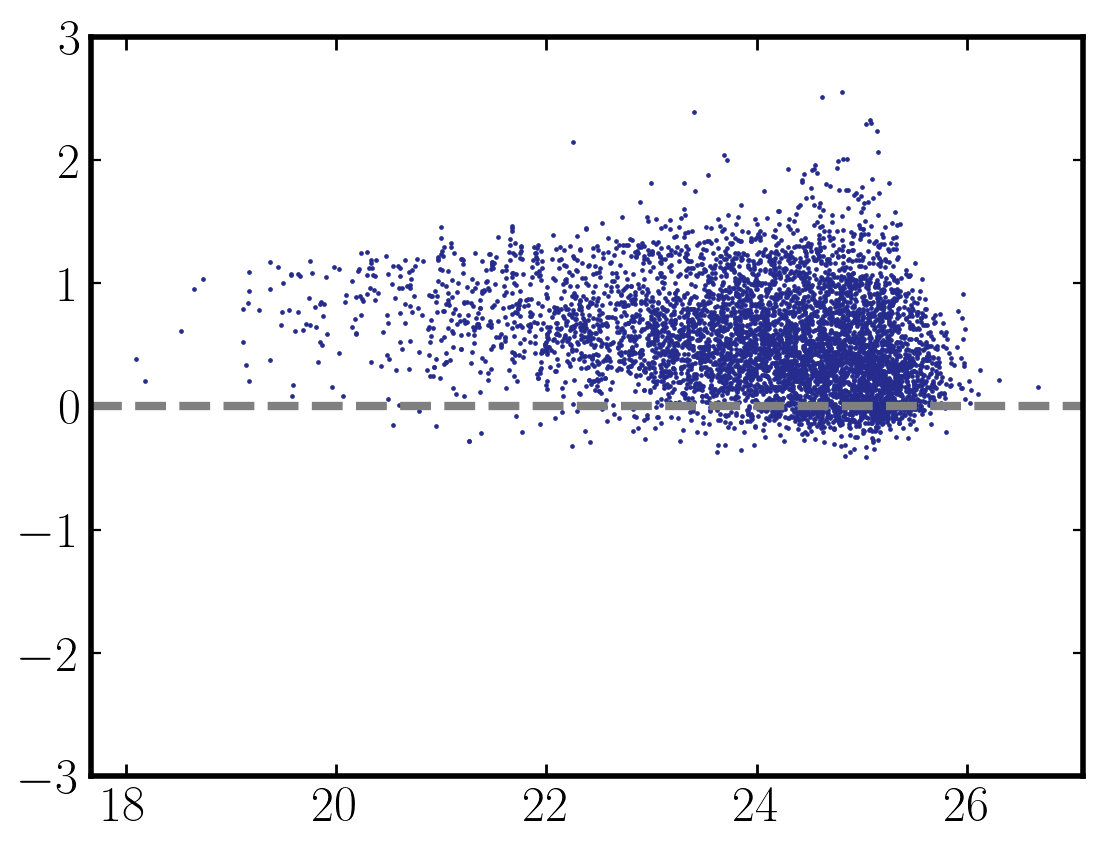

In [80]:
b1 = "g"
b2 = "r"
plt.scatter(mag_truth["i"], mag[b1] - mag[b2], s=0.5)
plt.ylim(-3, 3)
plt.axhline(y=0, color = "grey", ls ="--")

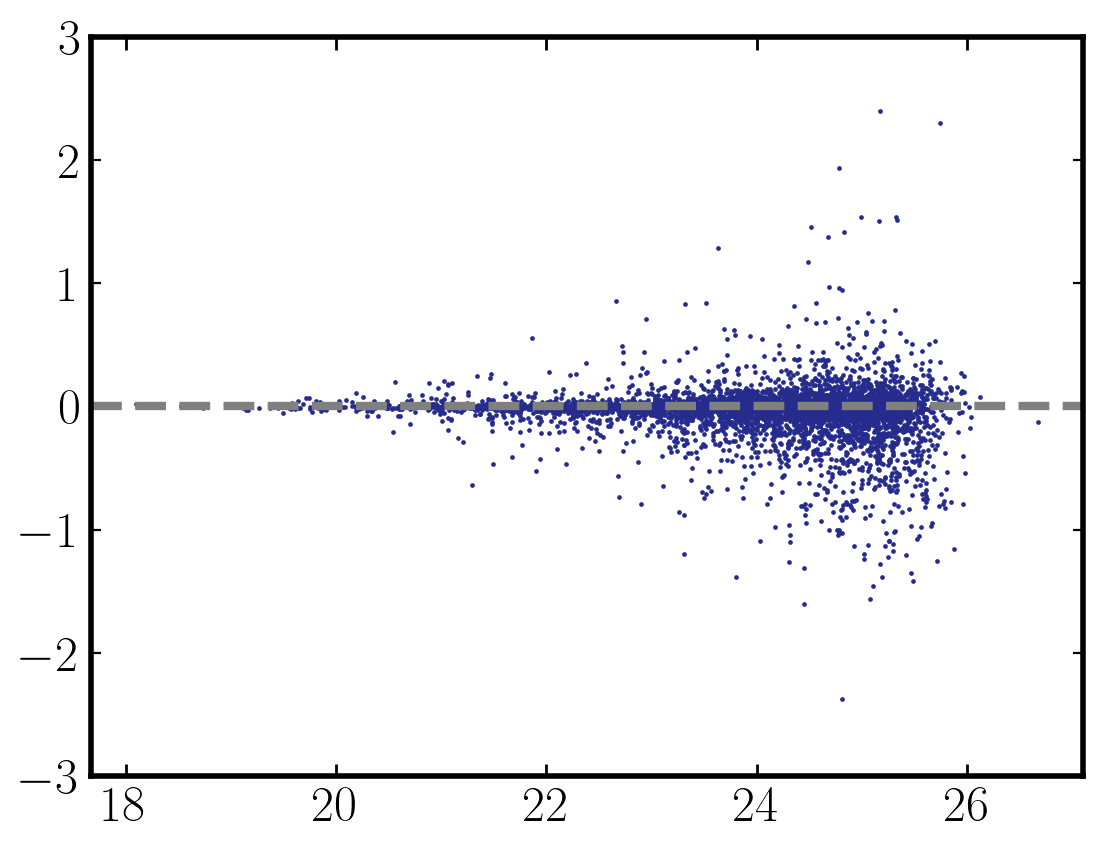

In [81]:
plt.scatter(mag_truth["i"], mag_dm[b1] - mag_dm[b2] - (mag_truth[b1] - mag_truth[b2]), s=0.5)
plt.ylim(-3, 3)
plt.axhline(y=0, color = "grey", ls ="--")